In [2]:
# load data and import seaborn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn import svm
import numpy as np

In [46]:
data = pd.read_csv("../data/GemPy_models/Synthetic_well_data/gempy_model_4layers_horizontal_s7_5.csv")

In [52]:
SVN_seg(10000 , 1000, data)

0.039

In [3]:
def SVN_seg(C,gamma, data):
    # split data in training data and predict data
    data_train = data[data['Well Name'] == 'BH1']
    data_pred = data[data['Well Name'] != 'BH1']
    
    # define features (measurments)
    features = ['feature1','feature2','feature3','feature4']
    feature_vectors = data_pred[features]
    facies_labels = data_pred['layer']
    
    # standardizise the data
    scaler = StandardScaler().fit(feature_vectors)
    scaled_features = scaler.transform(feature_vectors)
    
    # split data to have crossvalidation data set
    X_train, X_cv, y_train, y_cv = train_test_split(scaled_features, facies_labels, test_size=0.05, random_state=42)
    
    # create model (support-vector machine)
    # --> parameters need to be tested for each data set
    clf = svm.SVC(C = C, gamma = gamma)
    # C = Penalty parameter C of the error term (smoothness of desicion surface)
    # gamma = inverse radius of singe traing data point 
    
    # train the model or algorthim
    clf.fit(X_train, y_train)
    
    #predict labels
    label_pred = clf.predict(scaled_features)
    
    label_true = data.layer[data['Well Name'] != 'BH1'].values
    
    error = np.round(len(np.where(label_pred - label_true != 0)[0])/len(label_true), 3)
    
    return error

In [6]:
# split data in training data and predict data
data_train = data[data['Well Name'] == 'BH1']
data_pred = data[data['Well Name'] != 'BH1']

In [7]:
# define features (measurments)
features = ['feature1','feature2','feature3','feature4']
feature_vectors = data_pred[features]
facies_labels = data_pred['layer']

In [8]:
# standardizise the data
scaler = StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [9]:
# split data to have crossvalidation data set
X_train, X_cv, y_train, y_cv = train_test_split(scaled_features, facies_labels,
test_size=0.05, random_state=42)

In [10]:
# create model (support-vector machine)
# --> parameters need to be tested for each data set
clf = svm.SVC(C=10, gamma=1)
# C = Penalty parameter C of the error term (smoothness of desicion surface)
# gamma = inverse radius of singe training data point 

In [11]:
# train the model or algorthim
clf.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
label_pred = clf.predict(scaled_features)

In [13]:
label_true = data.layer[data['Well Name'] != 'BH1'].values

In [14]:
label_true

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [15]:
error = np.round(len(np.where(label_pred - label_true != 0)[0])/len(label_true), 3)

In [16]:
error

0.024

### Seaborn pairplot

In [28]:
import seaborn as sns
data_sns = data.drop(['X','Y','Z','Well Name'], axis = 1)
data_sns['layer'] = 'layer ' + data_sns['layer'].astype(str)

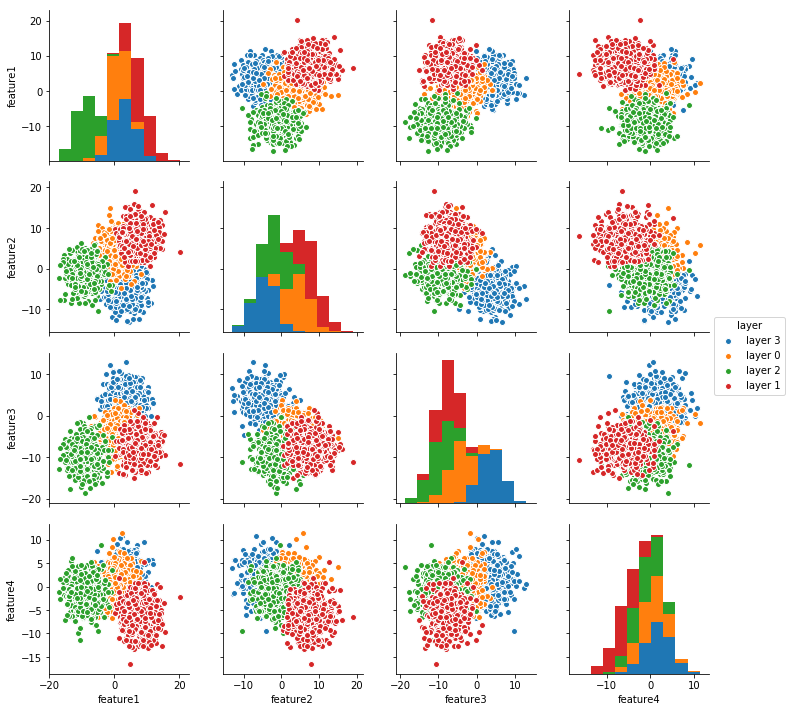

In [29]:
sns.pairplot(data_sns, hue ='layer')